# An analysis of Speed Dating

### This anaylsis begins with creating a dataframe of relevant data; partner decisions, matches, and intended careers. A summary pie chart is produced to show the amount of positive and negative matches for all instances of speed dating. From there, calculations of positive or negative matches based on intended career were run. As well as partner positive or negative decisions(even if no match occurred) based on intended career. The total numbers as well as percentages were figured. These calculations were put into a summary dataframe. Next potential outliers were produced based on the total number of participants within a specific intended career. There were two careers that were potential outliers; academic researchers and business/finance careers. A bar chart was created to show the careers that had the best percentages of finding a positive match. The three careers that found the most success were Athletics, Psychology, and Law. The three careers that found least success were Speech Pathology, Real Estate, and Politics. Using the potential outliers, a trimmed summary dataframe was created to take that data into account. From there, a whisker box plot is shown based on percentage of positive matches. This plot showed one outlier. Athletics with a 30% positive match rate. Another bar chart shows the trimmed summary. From here, the focus shifted towards positive partner decisions. A positive partner decision is recorded as receiving a yes from your speed dating partner, even though you chose no for them leading to a negative match. A bar chart is produced to show the careers that received the highest percentage of positive partner decisions. Those intending to go into real estate or a career considered "other" led the way with 50% or more positive partner decisions. Real estate is interesting because they received the highest percentage of positive partner decisions but was among the lowest for positive match percentages. Finally, there is a bar chart summarizing total numbers of matches and partner decisions per career.

### The next piece of analysis looks into age and total number of positive or negative matches, starting with a dataframe of the relevant information. Scatter plots for both positive and negative matches per age were created along with linear regressions and correlation statistics. Negative matches based on age had a correlation of -0.38. This means there is a weak negative correlation between age and negative matches. Postive matches had a correlation of -0.5. This determines that there is a moderate negative correlation between age and a positive match.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
# Reference the file where the CSV is located
file = "Output/CleanedSpeed.csv"

# Import the data into a Pandas DataFrame
dating_df = pd.read_csv(file)
dating_df

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Partner Preference Attractive,Partner Preference Sincere,Partner Preference Intelligence,...,Own Rating Ambition,Decision,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date
0,1,Female,1,No,No,27.0,White,35.0,20.0,20.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
1,1,Female,1,No,No,22.0,White,60.0,0.0,0.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
2,1,Female,1,Yes,Yes,22.0,Asian,19.0,18.0,19.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
3,1,Female,1,Yes,No,23.0,White,30.0,5.0,15.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
4,1,Female,1,Yes,No,24.0,Latino,30.0,10.0,20.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,552,Male,21,No,No,26.0,Latino,10.0,10.0,30.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6812,552,Male,21,No,No,24.0,Other,50.0,20.0,10.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6813,552,Male,21,No,No,29.0,Latino,40.0,10.0,30.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6814,552,Male,21,No,No,22.0,Asian,10.0,25.0,25.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0


In [3]:
# Cleaning column Decision of Partner
dating_df['Decision of Partner'] = dating_df['Decision of Partner'].replace([0],'No')
dating_df['Decision of Partner'] = dating_df['Decision of Partner'].replace([1],'Yes')

In [4]:
# Dataframe with relevant material
career_match = dating_df[['Decision of Partner','Match','Intended Career']]
# Drop blank rows
career_match.dropna(how='any', inplace=True)
career_match

/Users/tommysmacbook/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Decision of Partner,Match,Intended Career
30,No,No,Lawyer
31,No,No,Lawyer
32,Yes,No,Lawyer
33,Yes,Yes,Lawyer
34,Yes,No,Lawyer
...,...,...,...
6811,Yes,No,Other
6812,No,No,Other
6813,No,No,Other
6814,Yes,No,Other


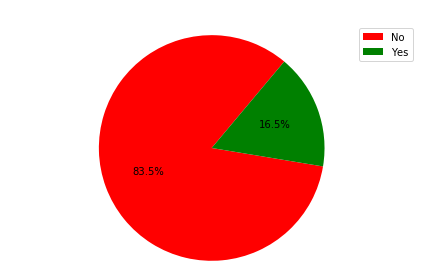

In [5]:
# Pie chart of total matches positive or negative
total_matches = career_match['Match'].value_counts()

colors = ['red','green']
explode = (0,0)
labels = list(total_matches.index)

plt.pie(total_matches, explode=explode, colors=colors, autopct='%1.1f%%', startangle=50)
plt.subplots_adjust(top=.5)
plt.rcParams["figure.figsize"] = (6, 4)
plt.title("Percentage of Positive and Negative Matches", fontsize='14', color='white')
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.tight_layout()
plt.savefig("Output/Q4_images/Fig1.png", bbox_inches = 'tight')
plt.show()

In [6]:
# amount of postive matches per career
yes_df = career_match.loc[career_match['Match']=='Yes']
career_yes = yes_df.groupby(['Intended Career']).count()['Match']

# amount of negative matches per career
no_df = career_match.loc[career_match['Match']=='No']
career_no = no_df.groupby(['Intended Career']).count()['Match']

In [7]:
# amount of no partner decisions per career
no_dec_df = career_match.loc[career_match['Decision of Partner']=='No']
dec_no = no_dec_df.groupby(['Intended Career']).count()['Decision of Partner']

# amount of yes partner decisions per career
yes_dec_df = career_match.loc[career_match['Decision of Partner']=='Yes']
dec_yes = yes_dec_df.groupby(['Intended Career']).count()['Decision of Partner']

In [8]:
# Percentages of yes or no decisions per career
total_dec = (dec_yes + dec_no)
dec_perc_yes = (dec_yes / total_dec) * 100
dec_perc_no = (dec_no / total_dec) * 100

# Percentages of yes or no matches per career
total_match = (career_yes + career_no)
match_perc_yes = (career_yes / total_match) * 100
match_perc_no = (career_no / total_match) * 100

In [9]:
total_summary_df = pd.DataFrame({"Number of Positive Matches": career_yes,
                                    "Number of Negative Matches": career_no,
                                    "Total Matches": total_match,
                                    "Number of Positive Decisions": dec_yes,
                                    "Number of Negative Decisions": dec_no,
                                    "Percentage of Positive Matches": match_perc_yes,
                                    "Percentage of Negative Matches": match_perc_no,
                                    "Percentage of Positve Decisions": dec_perc_yes,
                                    "Percentage of Negative Decisions": dec_perc_no})
total_summary_df

,Number of Positive Matches,Number of Negative Matches,Total Matches,Number of Positive Decisions,Number of Negative Decisions,Percentage of Positive Matches,Percentage of Negative Matches,Percentage of Positve Decisions,Percentage of Negative Decisions
Intended Career,,,,,,,,,
Academic/Research,273,1487,1760,685,1075,15.511364,84.488636,38.920455,61.079545
Architecture,1,9,10,4,6,10.000000,90.000000,40.000000,60.000000
Athletics,3,7,10,4,6,30.000000,70.000000,40.000000,60.000000
Business/Finance,277,1315,1592,669,923,17.399497,82.600503,42.022613,57.977387
Creative Arts,103,545,648,272,376,15.895062,84.104938,41.975309,58.024691
Doctor,67,302,369,175,194,18.157182,81.842818,47.425474,52.574526
Engineer,36,198,234,79,155,15.384615,84.615385,33.760684,66.239316
International Affairs,56,339,395,184,211,14.177215,85.822785,46.582278,53.417722
Journalism,8,36,44,19,25,18.181818,81.818182,43.181818,56.818182


In [10]:
# Finding potential outliers on the total amount of matches
quartiles = total_summary_df['Total Matches'].quantile([.25,.5,.75])
print(quartiles)
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
iqr
lowerbound = lowerq - (1.5 * iqr)
print(lowerbound)
upperbound = upperq + 1.5 * iqr
upperbound

0.25     44.0
0.50    234.0
0.75    395.0
Name: Total Matches, dtype: float64
-482.5


921.5

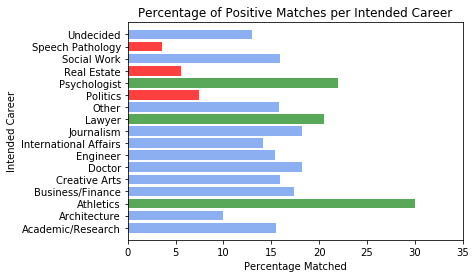

In [11]:
# bar chart of postive match percentages per career
# matches_df = pd.DataFrame({'Percentage of Positive Matches': match_perc_yes})
x_axis = np.arange(len(total_summary_df))
y_axis = total_summary_df['Percentage of Positive Matches']  #.astype(int)

tick_loc = [value for value in x_axis]
colors = [('forestgreen' if y >= 20 else ('red' if y <= 9 else 'cornflowerblue')) for y in y_axis]
x_ticks = list(total_summary_df.index.values)
plt.yticks(tick_loc, x_ticks, rotation='0')

plt.xlim(0, 35)
plt.ylim(-1, len(x_axis))
plt.rcParams["figure.figsize"] = (8, 6)

plt.title("Percentage of Positive Matches per Intended Career")
plt.xlabel('Percentage Matched')
plt.ylabel('Intended Career')

plt.barh(x_axis, y_axis, color=colors, alpha=.75, align='center')
plt.savefig("Output/Q4_images/Fig2.png", bbox_inches = 'tight')
plt.show()

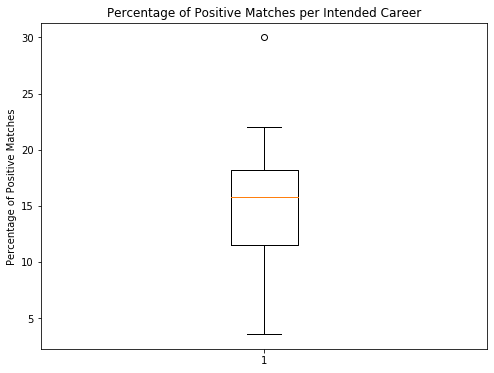

In [12]:
# Trim the dataframe to account for potential outliers 
trimmed_df = total_summary_df.drop(total_summary_df[total_summary_df['Total Matches']>921.5].index)
# Whisker and box plot of Percentage of positive matches
fig1, ax1 = plt.subplots()
ax1.set_title('Percentage of Positive Matches per Intended Career')
ax1.set_ylabel('Percentage of Positive Matches')
ax1.boxplot(trimmed_df['Percentage of Positive Matches'])
plt.savefig("Output/Q4_images/Fig3.png", bbox_inches = 'tight')
plt.show()

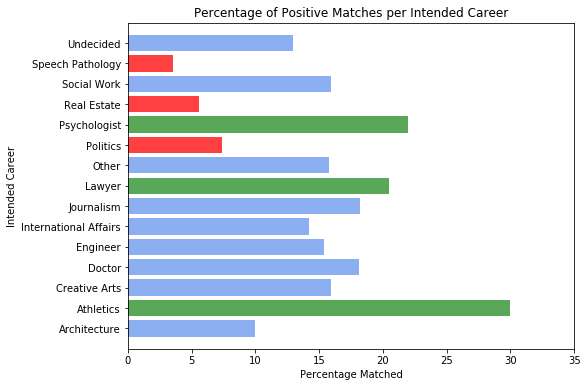

In [13]:
# Bar chart of percentage of positive matches accounting the potential outliers
x_axis = np.arange(len(trimmed_df))
y_axis = trimmed_df['Percentage of Positive Matches']  #.astype(int)

tick_loc = [value for value in x_axis]
colors = [('forestgreen' if y >= 20 else ('red' if y <= 9 else 'cornflowerblue')) for y in y_axis]
x_ticks = list(trimmed_df.index.values)
plt.yticks(tick_loc, x_ticks, rotation='0')

plt.xlim(0, 35)
plt.ylim(-1, len(x_axis))
plt.rcParams["figure.figsize"] = (8, 6)

plt.title("Percentage of Positive Matches per Intended Career")
plt.xlabel('Percentage Matched')
plt.ylabel('Intended Career')

plt.barh(x_axis, y_axis, color=colors, alpha=.75, align='center')
plt.savefig("Output/Q4_images/Fig4.png", bbox_inches = 'tight')
plt.show()

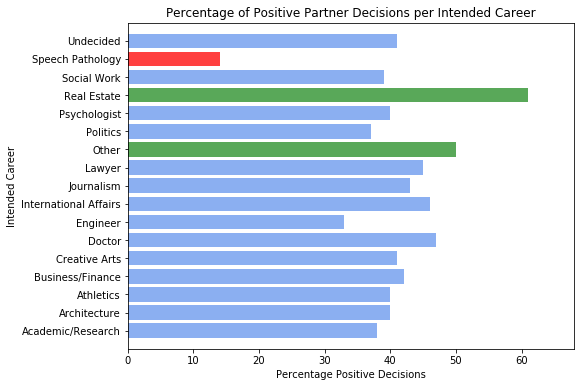

In [14]:
# bar chart of postive partner decision percentages per career
decisions_df = pd.DataFrame({'Percentage of Positive Decisions': dec_perc_yes})
x_axis = np.arange(len(decisions_df))
y_axis = decisions_df['Percentage of Positive Decisions'].astype(int)

tick_loc = [value for value in x_axis]
colors = [('forestgreen' if y >= 49 else ('red' if y <= 20 else 'cornflowerblue')) for y in y_axis]
x_ticks = list(decisions_df.index.values)
plt.yticks(tick_loc, x_ticks, rotation='0')

plt.xlim(0, 68)
plt.ylim(-1, len(x_axis))
plt.rcParams["figure.figsize"] = (8, 6)

plt.title("Percentage of Positive Partner Decisions per Intended Career")
plt.xlabel('Percentage Positive Decisions')
plt.ylabel('Intended Career')

plt.barh(x_axis, y_axis, color=colors, alpha=.75, align='center')
plt.savefig("Output/Q4_images/Fig5.png", bbox_inches = 'tight')
plt.show()

In [15]:
# summary dataframe of total yes, no matches and decisions per career
df_summary = pd.DataFrame({"Number of Yes Matches": career_yes,
                                    "Number of No Matches": career_no,
                                    "Number of Yes Decisions": dec_yes,
                                    "Number of No Decisions": dec_no,})

# dropped matches under ten for an easier to read table
trimmed_summary = df_summary.drop(df_summary[df_summary['Number of Yes Matches']<10].index)
trimmed_summary

,Number of Yes Matches,Number of No Matches,Number of Yes Decisions,Number of No Decisions
Intended Career,,,,
Academic/Research,273,1487,685,1075
Business/Finance,277,1315,669,923
Creative Arts,103,545,272,376
Doctor,67,302,175,194
Engineer,36,198,79,155
International Affairs,56,339,184,211
Lawyer,129,500,285,344
Psychologist,53,188,97,144
Social Work,35,185,86,134


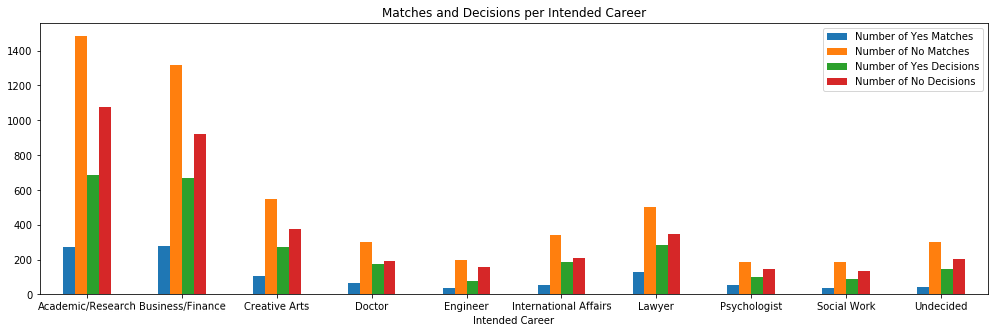

In [16]:
trimmed_summary.plot(kind='bar', figsize=(17,5), title='Matches and Decisions per Intended Career',
            rot=0.25)
plt.savefig("Output/Q4_images/Fig6.png", bbox_inches = 'tight')

In [17]:
# Dataframe of matches based on Age
age_match = dating_df[['Age', 'Match']]
age_match.dropna(how='any', inplace=True)
age_match

/Users/tommysmacbook/opt/anaconda3/envs/pythondata1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Match
0,21.0,No
1,21.0,No
2,21.0,Yes
3,21.0,Yes
4,21.0,Yes
...,...,...
6811,25.0,No
6812,25.0,No
6813,25.0,No
6814,25.0,No


In [18]:
# Negative matches based on Age
no_match = age_match.loc[age_match['Match']=='No']
no_age = no_match.groupby(['Age']).count()

The correlation between age and the amount of matches is -0.38


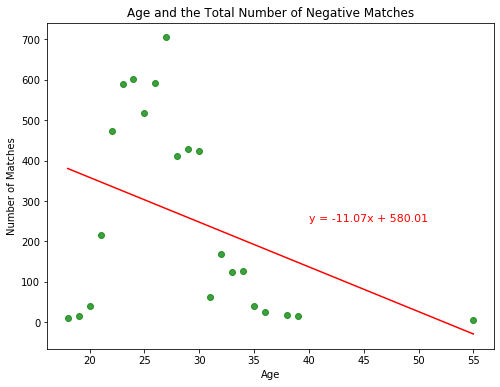

In [19]:
# Scatter plot and line regression with correlation of negative matches per age
no_age = no_age.reset_index()
age2 = no_age['Age']
match2 = no_age['Match']

correlation = sts.pearsonr(age2,match2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(age2, match2)
regress_values = age2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(age2, match2, marker="o", facecolors="green",
             alpha=0.75)
plt.plot(age2,regress_values,"r-")

plt.annotate(line_eq,(40,250),fontsize=11,color="red")
plt.title("Age and the Total Number of Negative Matches")
plt.xlabel("Age")
plt.ylabel("Number of Matches")
print(f"The correlation between age and the amount of matches is {round(correlation[0],2)}")
plt.savefig("Output/Q4_images/Fig7.png", bbox_inches = 'tight')
plt.show()

In [20]:
# Positive matches per age
yes_match = age_match.loc[age_match['Match']=='Yes']
yes_age = yes_match.groupby(['Age']).count()


The correlation between age and the amount of matches is -0.5


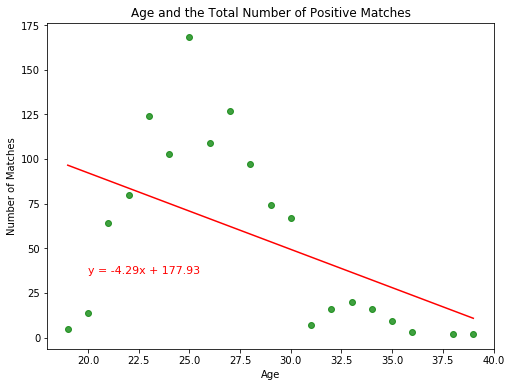

In [21]:
# Scatter plot and line regression with correlation of positive matches per age
yes_age = yes_age.reset_index()
age1 = yes_age['Age']
match1 = yes_age['Match']

correlation = sts.pearsonr(age1,match1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(age1, match1)
regress_values = age1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(age1, match1, marker="o", facecolors="green",
             alpha=0.75)
plt.plot(age1,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=11,color="red")
plt.title("Age and the Total Number of Positive Matches")
plt.xlabel("Age")
plt.ylabel("Number of Matches")
print(f"The correlation between age and the amount of matches is {round(correlation[0],2)}")
plt.savefig("Output/Q4_images/Fig8.png", bbox_inches = 'tight')
plt.show()